# Исследование общепита Москвы

Я решил открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Для оргументации мне нужно подготовить исследование рынка. Для этого у меня есть открытые данные по общепиту г Москва.

# Ипрорт данных

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [79]:
try:
    df = pd.read_csv('/Users/Lenovo/Desktop/ЯП/Проекты/Проект 7/rest_data.csv')
except:
    df = pd.read_csv('/datasets/rest_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Данные выгрузил, вижу что в данных отсутсвуют пропуски, нужно проверить наличие дубликатов и привести все стрико к нижнему регистру.

# Подготовка данных

Начну с приведегия данных к нижнему регистру

In [80]:
df['object_name'] = df['object_name'].str.lower()

А теперь проверю наличие дубликатов как во всех строках, так и отдельно по столбцам

In [81]:
df.duplicated().value_counts()

False    15366
dtype: int64

В таблице нет дублирующих строк, проверю столбцы

In [82]:
def dup (column):
    print(df[column].duplicated().value_counts())
dup('id')

False    15366
Name: id, dtype: int64


в столбце `id` нет дубликатов, перехожу дальше

In [83]:
dup('object_name')
df['object_name'].value_counts().head(10)

False    9924
True     5442
Name: object_name, dtype: int64


столовая           321
кафе               278
шаурма             250
шоколадница        158
kfc                155
макдоналдс         151
бургер кинг        137
теремок             94
домино'с пицца      90
крошка картошка     90
Name: object_name, dtype: int64

В столбце `object_name` ожидаемо имеются дубликаты, общепита с названиями "Кафе" или "Столовая" в москве много, плюс сетевой общепит.

In [84]:
dup('address')
df['address'].value_counts().head(10)

False    9108
True     6258
Name: address, dtype: int64


город Москва, Ходынский бульвар, дом 4            95
город Москва, Пресненская набережная, дом 2       63
город Москва, проспект Мира, дом 211, корпус 2    60
город Москва, Кировоградская улица, дом 13А       53
город Москва, площадь Киевского Вокзала, дом 2    48
город Москва, Мытная улица, дом 74                46
город Москва, улица Земляной Вал, дом 33          46
город Москва, улица Новый Арбат, дом 21           42
город Москва, улица Ленинская Слобода, дом 26     41
город Москва, Кутузовский проспект, дом 57        40
Name: address, dtype: int64

Наличие дупликатов в этом столбце тоже не удивительно, адреса с большим количеством дубликатом это торговые центры где имеются фудзоны.

In [85]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

в данном столбце все данные разбиты по типу заведения, отмечу что тип общепита *кафе* преобладает в таблице

Проанализирую столбец *number*

0     1621
40     835
20     727
30     685
10     644
50     560
60     472
80     464
15     360
45     360
Name: number, dtype: int64


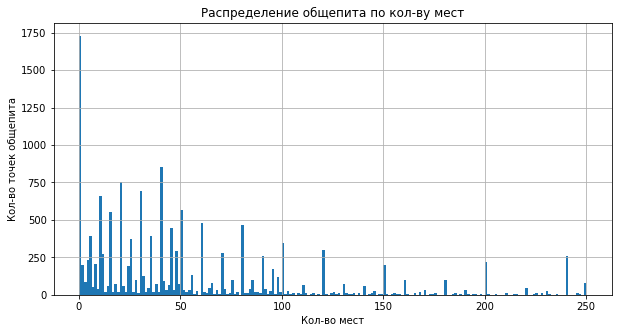

In [86]:
print(df['number'].value_counts().head(10))
df['number'].hist(bins=200, figsize = (10,5), range = (0, 250))
plt.title('Распределение общепита по кол-ву мест')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во точек общепита')
plt.show()

На распределениии заметны большое скопление заведений с нулевым количеством посадочных мест, предпологаю что данная часть это общепиты работающие на вынос или на доставку, плотное скопление в распределении от 0 до 100 мест.

Данные готовы к аналицу, дубликатов не обнаружено, пропусков нет, названия кафе приведени к нижнему регистру.

# Анализ данных

## Исследую соотношение видов объектов общественного питания по количеству. 

In [87]:
print(df['object_type'].value_counts())

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64


Кафе больше всего в Москве, на последних местах закусочные и кулинария

## Исследую соотношение сетевых и несетевых заведений по количеству. 

нет    12398
да      2968
Name: chain, dtype: int64


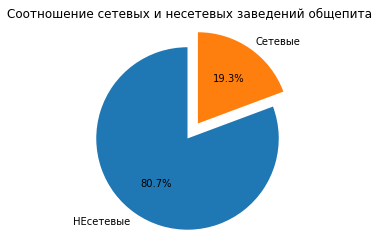

In [88]:
print(df['chain'].value_counts())
plt.pie((df['chain'].value_counts()), 
        autopct='%1.1f%%', 
        startangle=90, 
        labels = ('НЕсетевые','Сетевые'), 
        explode= (0.1,0.1))

plt.title('Соотношение сетевых и несетевых заведений общепита')
plt.axis('equal')
plt.show()

Не сетевых заведений в Москве в 4 раза больше, а казалось что наоборот, малый и сдедний бизнес продолжает боротся с гигантами индустрии.

## Найду для какого вида объекта общественного питания характерно сетевое распространение?

In [89]:
chain_cafes = df[df['chain'] == 'да']
display(chain_cafes['object_type'].value_counts())

кафе                                 1396
предприятие быстрого обслуживания     791
ресторан                              544
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              52
бар                                    37
буфет                                  11
столовая                                3
Name: object_type, dtype: int64

Ожидаемо что порядка 90 % всех сетевых заведений это  `кафе`, `предприятия быстрого обслуживания` и и так называемые `рестораны`,  совпадает с моим представлением о крупных сетевых представителях в этом бизнесе.

## Иследую что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

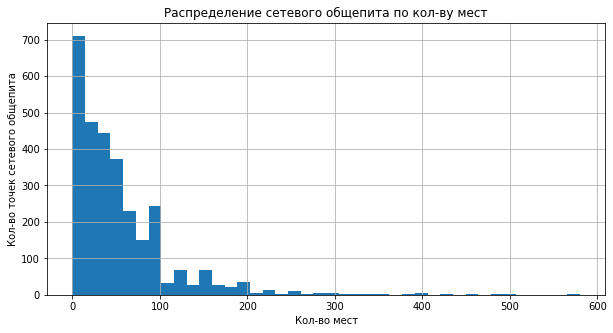

In [90]:
chain_cafes['number'].hist(bins=40, figsize = (10,5))
plt.title('Распределение сетевого общепита по кол-ву мест')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во точек сетевого общепита')
plt.show()

На графике видно что для сетевого общепита в основном характерно наличие посадочных мест от 0 до 100, и не смотря на то что пик графика расположен около значения 0, я не могу сказать что это точно характеризует сетевой общепит, 

## Для каждого вида объекта общественного питания опишу среднее количество посадочных мест. 

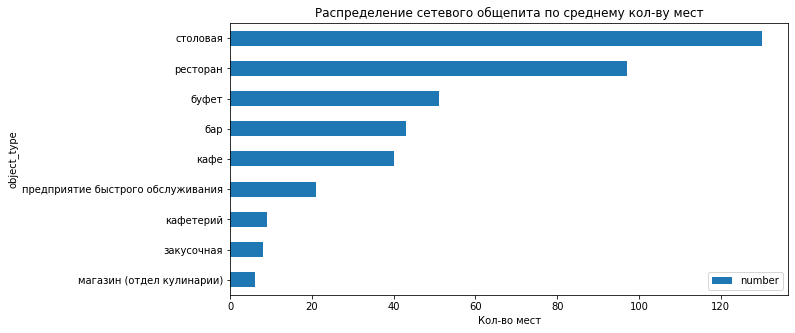

In [91]:
numbers = df.groupby('object_type')['number'].mean().round().astype('int64').sort_values(ascending = True).reset_index()

numbers.plot.barh(x='object_type', y='number', legend=True, figsize=(10,5))
plt.title('Распределение сетевого общепита по среднему кол-ву мест')
plt.xlabel('Кол-во мест')
plt.show()

Как показывает график, среднее количество посадочных мест у закусочных и кулинари и кафетерий близка к 10, а в рестораннах и столовых среднее число превышает 100 посадочных мест.
Лидер по количеству точек ощепита *Кафе* в среднем имеет 45 посадочных мест.

## Выделю в отдельный столбец информацию об улице из столбца address

In [92]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Выделю улицу послп первой запятой, методом  *split* и затем удалю пробел который остается перед улицей методом *strip* и за счет лямды добавим в отдельный столбец

In [93]:
df['street'] = df['address'].apply(lambda x: x.split(",")[1].strip())

df['street'].value_counts().head(15)

город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Ходынский бульвар         102
Ленинградское шоссе       100
Дмитровское шоссе         100
Name: street, dtype: int64

Вижу что в первые 15 улиц с наибольшим количествоим общепита попали *город Зеленогорск* и *поселение Сосенское*, гляну состоят ли они из одной улицы

In [94]:
display(df[df['street'] == 'город Зеленоград']['address'].value_counts().head(3))
display(df[df['street'] == 'поселение Сосенское']['address'].value_counts().head(3))

город Москва, город Зеленоград, Крюковская площадь, дом 1            11
город Москва, город Зеленоград, площадь Юности, дом 2, строение 1     7
город Москва, город Зеленоград, Панфиловский проспект, дом 6А         7
Name: address, dtype: int64

город Москва, поселение Сосенское, Калужское шоссе, 22-й километр, дом 10                              38
город Москва, поселение Сосенское, ж/к "Дубровка", Сосновая улица, дом 15                               6
город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 96, корпус 2     5
Name: address, dtype: int64

Выделил в отдельный столбец улицу нахождения общепита и обнаружил что в нее попадают поселки и города входящие в г.Москва, подробнее расмотрел данные города, расмотрел кол-во общепита на улицах этих городов, как показывают данные общепиты в этих городах сосредоточены не на одной улице а распределены по многим улицам.

## Построю график топ-10 улиц по количеству объектов общественного питания. 

При формировании топ 10 улиц по кол-ву общепитов, я не буду учитыть за улицы населенные пункты Зеленоград и Сосенское, так как предыдущий анализ дал понять что общепиты в данных населенных пунктах распределены по разным улицам и количество не достаточное для попадания в топ 10. 

In [95]:
top_10_street = (
    df.groupby('street')['id']
    .nunique()
    .sort_values(ascending = False)
    .drop(['город Зеленоград','поселение Сосенское'],axis = 0)
    .iloc[:10]
    .reset_index()
)

top_10_street

,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Воспользуюсь внешней информацией для ответа на вопрос, в каких районах находятся данные улицы

In [96]:
districts = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1')
str_and_areas_merge =pd.merge(top_10_street, districts,  left_on = 'street', right_on = 'streetname' )

str_and_areas_merge.head()

,street,id,streetname,areaid,okrug,area
0,проспект Мира,204,проспект Мира,70,СВАО,Алексеевский район
1,проспект Мира,204,проспект Мира,86,СВАО,Ярославский Район
2,проспект Мира,204,проспект Мира,78,СВАО,Район Марьина роща
3,проспект Мира,204,проспект Мира,79,СВАО,Останкинский район
4,проспект Мира,204,проспект Мира,81,СВАО,Район Ростокино


Сгрупирую данные так что бы в одной строке были все районы в которые попадает каждая из топ-10 улиц по кол-ву общепита, а следом через цикл получу перечень данных районов.

In [97]:
street_and_areas = (
    str_and_areas_merge
    .groupby('street')
    .agg({'area':'unique'})
    .reset_index()
)
i = 0
for street, areas in zip(street_and_areas['street'], street_and_areas['area']):
    print(street, 'находится в:')
    for area in areas:
        i +=1
        print(i, area)
    i = 0    
    print('')   

Варшавское шоссе находится в:
1 Район Чертаново Центральное
2 Район Чертаново Северное
3 Район Чертаново Южное
4 Донской район
5 Район Нагатино-Садовники
6 Нагорный район
7 Район Северное Бутово
8 Район Южное Бутово

Каширское шоссе находится в:
1 Район Москворечье-Сабурово
2 Район Нагатино-Садовники
3 Район Орехово-Борисово Южное
4 Район Орехово-Борисово Северное

Кировоградская улица находится в:
1 Район Чертаново Центральное
2 Район Чертаново Северное
3 Район Чертаново Южное

Кутузовский проспект находится в:
1 Район Дорогомилово
2 Район Фили-Давыдково

Ленинградский проспект находится в:
1 Район Аэропорт
2 Район Беговой
3 Хорошевский район
4 Район Сокол

Ленинский проспект находится в:
1 Район Проспект Вернадского
2 Район Тропарево-Никулино
3 Донской район
4 Район Гагаринский
5 Ломоносовский район
6 Обручевский район
7 Район Теплый Стан
8 Район Якиманка

Пресненская набережная находится в:
1 Пресненский район

Профсоюзная улица находится в:
1 Академический район
2 Район Черемушки
3

Улицы с большим количеством общепита находятся одновременно наскольких районах, что говорит о их протяженности и размерах, так-же на данных улицах находятся торговые центры.

## Найду  число улиц с одним объектом общественного питания.  улицы?

Для начала создам отдельную таблицу с улицами с одним общепитом, и найду их число

In [98]:
streets = df['street'].value_counts().reset_index()
streets.columns = ['street', 'amount']
alone_street =  streets[streets['amount'] == 1]
display(alone_street.head())

print('Количество улиц с одним объектом общественного питания:', len(alone_street))

,street,amount
1321,2-я Квесисская улица,1
1322,Нижний Журавлёв переулок,1
1323,Жигулёвская улица,1
1324,Бутиковский переулок,1
1325,Театральная аллея,1


Количество улиц с одним объектом общественного питания: 579


Соединю получившуюся таблицу с таблицой с районами, и посмотрю в какие районы они попадают

In [99]:
str_and_areas_1 = pd.merge(alone_street, districts,  right_on = 'streetname', left_on = 'street' )
str_and_areas_1.head()

,street,amount,streetname,areaid,okrug,area
0,2-я Квесисская улица,1,2-я Квесисская улица,65,САО,Савеловский район
1,Нижний Журавлёв переулок,1,Нижний Журавлёв переулок,34,ВАО,Район Преображенское
2,Нижний Журавлёв переулок,1,Нижний Журавлёв переулок,36,ВАО,Район Соколиная Гора
3,Жигулёвская улица,1,Жигулёвская улица,113,ЮВАО,Район Кузьминки
4,Бутиковский переулок,1,Бутиковский переулок,20,ЦАО,Район Хамовники


Гляну, есть ли улицы которые находятся одновременно в нескольких районах

In [100]:
print(str_and_areas_1.groupby('street').agg({'area':'nunique'}).sort_values('area', ascending = False).head(10))

                       area
street                     
11-я Парковая улица       3
Нарвская улица            3
улица Достоевского        3
Хавская улица             3
площадь Журавлёва         2
Малая Тульская улица      2
улица Павла Андреева      2
улица Богородский Вал     2
Денежный переулок         2
Балтийская улица          2


такие улице имеются, но максимальное кол-во районов в котором расположена улиц равно 3, что наводит на предположения что данные улицы короткие или расположены в совсем новых районах Москвы.

Гляну в каких районах расположены данные улицы

In [101]:
print(str_and_areas_1.groupby('area').agg({'street':'nunique'}).sort_values('street', ascending = False).head(15))

                      street
area                        
Таганский район           27
Район Хамовники           26
Басманный район           25
Тверской район            20
Пресненский район         19
Район Марьина роща        18
Район Арбат               17
Мещанский район           16
Район Сокольники          15
Район Замоскворечье       14
Район Лефортово           12
Даниловский район         12
Район Соколиная Гора      12
Район Якиманка            11
Красносельский район      10


Получил улицы с одним общепитом, и в каких районах они располагаются, в процесе анализа сделал вывод что причина столь малого кол-ва общепита на этих улицах это маленькие размеры и молодой возвраст улиц.

## Посмотрю на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

Для начала отфильтрую основные данные по улицам из топ-10, и вспоминая предыдущий этап анализа отфильтрую  данные от выбросов

In [103]:
top_10_list = top_10_street['street'].to_list()
last_task = df.query('street == @top_10_list and number < 300')

Воспользуюсь библиотекой seaborn, построю распределение кол-ва посадочных мест в общепитах на улицах из топ-10

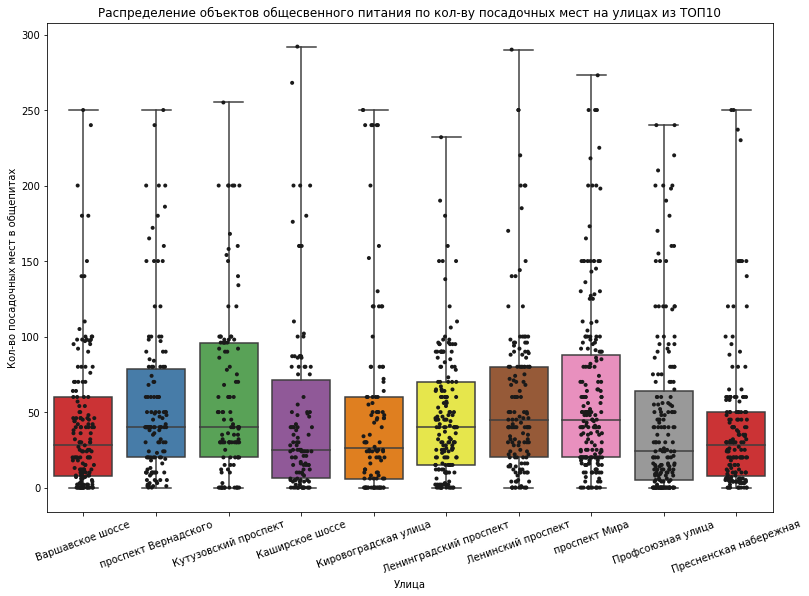

In [104]:
plt.figure(figsize=(13, 9))
plt.title('Распределение объектов общесвенного питания по кол-ву посадочных мест на улицах из ТОП10')
plt.xticks(rotation=20)
sns.stripplot(y='number', x='street', data=last_task, size = 4, jitter=0.15, color = '0.1')
sns.boxplot(y='number', x='street', data=last_task, whis=np.inf, palette="Set1")
plt.ylabel('Кол-во посадочных мест в общепитах')
plt.xlabel('Улица')
plt.show()

Медианы кол-ва посадочных мест в сравнении между улицами схожи, и находятся в диапазоне от 25 до 50 мест, а вот плотность распределения различаются от улицы к улице, но все же можно отметить что на большенсве улиц преобладают общепиты с кол-вом посадочных мест в среднем от 10 до 100.

# Вывод

Я провел анализ обьектов общественного питания по Москве и могу сделать следующие выводы:
- около 40% обьектов общественного питания в Москве это кафе.
- 81 % общепита не относится к сетевых заведениям
- большая часть заведений в Москве имеет кол-во посадочных мест от 0 до 100, среднее количество для Москвы это от 25 до 50 мест, в зависимости от типа заведения, в кафе например среднее кол-во посадочных мест около 40.
- улицы с наибольшим кол-вом заведений это протяженные проспекты и шоссе с наличием торговых центров и галерей, расположеные в центральной части и пересекающие несколько районов Москвы.
- наименьшее кол-во заведений общепита на коротких маленьких улечках или на новых улицах новых районов.

Могу дать рекомендации на окрытии кафе, с небольшим кол-вом посадочных мест и расположенном в одном из крупнейших торговых центров Москвы или рядом с ним.


Презентация:https://disk.yandex.ru/i/ZonUlmQd4LZwtA